 ## Example 1: Mass-spring-damper system or electrical R-C-L (bond-graph model simulation)
This example aims to show the capability of provided tools and some steps is not mandatory for simulation.

In [1]:

import sys
sys.path.append("../../")
from bond_graph_simulation.core.base import ElementFactory
from bond_graph_simulation.core.BondGraph2 import BondGraphModel
from bond_graph_simulation.rules.engine import RuleEngine
from bond_graph_simulation.equations.generator import EquationGenerator
from bond_graph_simulation.equations.statespace import CauchyFormGenerator
from bond_graph_simulation.equations.statespace import StateSpaceBuilder

from bond_graph_simulation.numerical.simulation import BondGraphSimulator
from bond_graph_simulation.inout.visualizer import draw_bond_graph, custom_layered_layout

import networkx as nx
import numpy as np


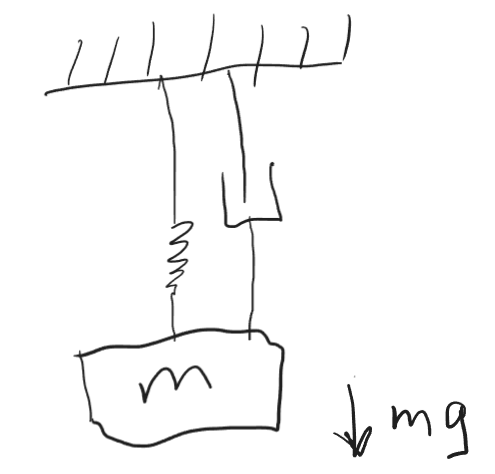

# Create a bond graph RLC with junctions

In [2]:
model = BondGraphModel("RLC with junctions")

# Create elements
se = ElementFactory.create('SE')
r = ElementFactory.create('R')
i = ElementFactory.create('I')
c = ElementFactory.create('C')
sf = ElementFactory.create('SF')

j1_1 = ElementFactory.create('1')  # 1-junction for SE and I
j1_2 = ElementFactory.create('1')  # 1-junction for 0 - RС
j0_0 = ElementFactory.create('0')  # 0-junction between R and C
j1_3 = ElementFactory.create('1')  # 1-junction for SF


# Connect components properly using junctions
model.connect(se, j1_1)   # SE -> j1_1
model.connect(i, j1_1)    # I -> 1-junction 1

model.connect(r, j1_2)    # R -> 1-junction 2
model.connect(c, j1_2)    # C -> 1-junction 2

model.connect(j1_1, j0_0)    # 0junction -> 1-junction 1
model.connect(j0_0, j1_3)    # 0junction -> 1-junction 3
model.connect(j0_0, j1_2)    # 0junction -> 1-junction 2

model.connect(j1_3, sf)    # 1-junction 3 -> SF



In [3]:
# Apply causality rules
engine = RuleEngine(model, debug=False)
engine.apply_all()
# engine.assign_sources_ports()

There is valid ckecking in apply_all() but if you want, yu can make double check

In [4]:
# problems = engine.find_invalid_bonds()
# if problems:
#     print("Detected some unvalid bonds:")
#     for p in problems:
#         print(p)
# else:
#     print("Allrights!")

In [5]:
# ONLY FOR DEBUGING (IF U NEED) just printes the internal params of model
# model.debug_display_elements_with_ports()

In [6]:
# ONLY FOR DEBUGING (IF U NEED)
# model.debug_display_bonds()

In [7]:
# for bond in model.bonds:
#     # Найти элементы, связанные с bond.from_port и bond.to_port
#     from_elem = next((e for e in model.elements if bond.from_port in e.ports), None)
#     to_elem = next((e for e in model.elements if bond.to_port in e.ports), None)
#     print(f"Bond {bond.id}:")
#     print(f"  FROM: {from_elem.name if from_elem else '???'} [{bond.from_port.name}]"
#           f" (direction={bond.from_port.direction}, causality={bond.from_port.causality})")
#     print(f"  TO:   {to_elem.name if to_elem else '???'} [{bond.to_port.name}]"
#           f" (direction={bond.to_port.direction}, causality={bond.to_port.causality})")
#     print("-" * 40)

In [8]:
# # Causality and direction output for ports
# for elem in model.elements:
#     print(elem.name)
#     for port in elem.ports:
#         print(f"{elem.name}: Port {port.name} -> direction={port.direction}, causality={port.causality}")

In [9]:
# element = model.find_element_by_port_name("Port_6")
# element.name

nodes len=  9


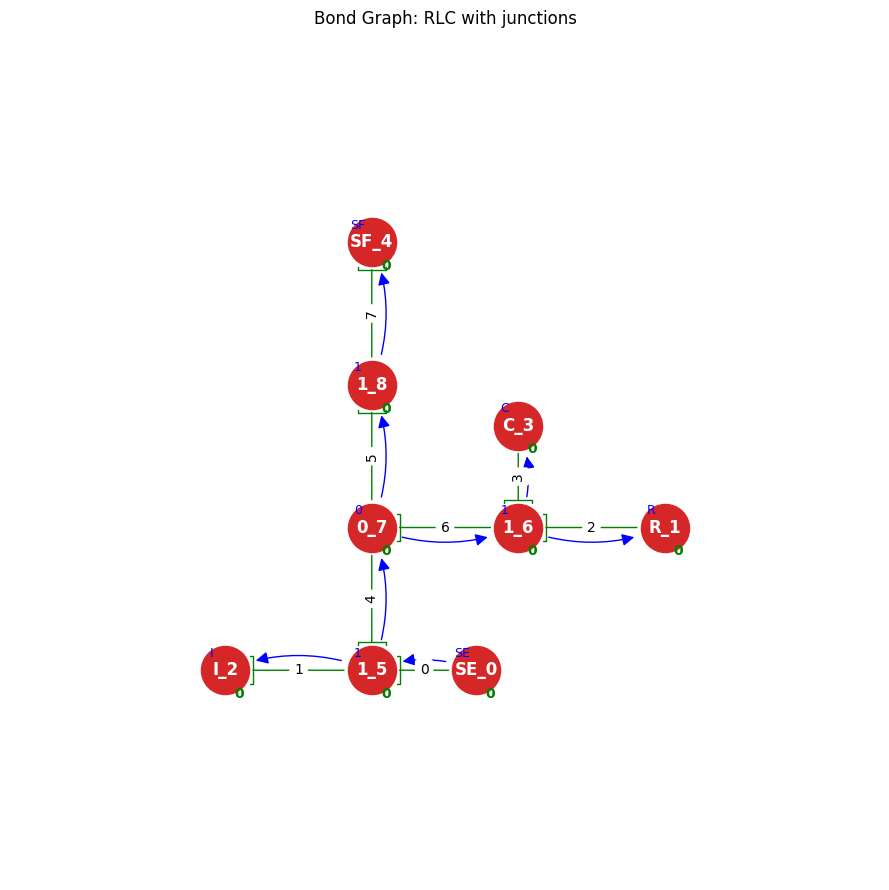

In [10]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

In [11]:
# 5) Generate equations (NOT REQUIRED later... Cochy will do it)
eqgen = EquationGenerator(model, debug=False)
eqs = eqgen.generate_equations()
# eqgen.visualize_equations()
# print(eqs)


In [12]:
eqgen.equations

[Eq(e0, SE0),
 Eq(f1, p2/I2),
 Eq(e2, R1*f2),
 Eq(e3, q3/C3),
 Eq(f7, SF4),
 Eq(f1, f0),
 Eq(f4, f0),
 Eq(e0 - e1 - e4, 0),
 Eq(f3, f2),
 Eq(f6, f2),
 Eq(-e2 - e3 + e6, 0),
 Eq(e5, e4),
 Eq(e6, e4),
 Eq(f4 - f5 - f6, 0),
 Eq(f7, f5),
 Eq(e5 - e7, 0)]

In [13]:


cform = CauchyFormGenerator(model, debug=False)
eqs = cform.build_cauchy_form()

self.final_vars =  [SE0, p2, I2, R1, q3, C3, SF4]
START RECURECIEVE SUBS

[CAUCHY STATE 1] Исходное: dotp2 = e1

[CAUCHY STATE 2] Исходное: dotq3 = f3


In [14]:
eqs

[Eq(dotp2, R1*SF4 + SE0 - R1*p2/I2 - q3/C3), Eq(dotq3, -SF4 + p2/I2)]

In [15]:
print("User have to define the output variables for the system to make possive the output equations generation")
print("USe COMMA as separator")
print(cform.get_all_ef_variables())




User have to define the output variables for the system to make possive the output equations generation
USe COMMA as separator
[e0, e1, e2, e3, e4, e5, e6, e7, f0, f1, f2, f3, f4, f5, f6, f7]


In [16]:
# cform.interactive_generate_output_equations()
## OR
cform.generate_output_equations('e3, f3')

Debug state: False
Entered list ['e3', 'f3']
symb entered list [e3, f3]

[OUTPUT] ROW Eq for output variable: e3 [<class 'sympy.core.symbol.Symbol'>]

[OUTPUT] ROW Eq for output variable: f3 [<class 'sympy.core.symbol.Symbol'>]

[INFO] Output equations:
Eq(e3, q3/C3)
Eq(f3, f2)

[OUTPUT] Generating output equation for: 1

[CAUCHY OUT 1] Исходное: e3 = q3/C3
my_subs {}

[OUTPUT] Generating output equation for: 2

[CAUCHY OUT 2] Исходное: f3 = f2
my_subs {f2: -SF4 + p2/I2}


[Eq(e3, q3/C3), Eq(f3, -SF4 + p2/I2)]

In [17]:
print("Сauchy form equations:")
cform.cauchy_equations[0], cform.cauchy_equations[1]

Сauchy form equations:


(Eq(dotp2, R1*SF4 + SE0 - R1*p2/I2 - q3/C3), Eq(dotq3, -SF4 + p2/I2))

In [18]:
print("Output equations: ")
cform.output_eqs

Output equations: 


[Eq(e3, q3/C3), Eq(f3, -SF4 + p2/I2)]

In [19]:
cform.final_vars

[SE0, p2, I2, R1, q3, C3, SF4]

## Make A B С D-matrix
Now we can set the input variables and get С-D-matrix

In [20]:
ssb = StateSpaceBuilder(model, cform, debug=False)
A, B, C, D = ssb.build_state_space()

In [21]:
ssb.x_vars, ssb.u_vars

([p2, q3], [SE0, SF4])

In [22]:
A, B , C, D 

(Matrix([
 [-R1/I2, -1/C3],
 [  1/I2,     0]]),
 Matrix([
 [1, R1],
 [0, -1]]),
 Matrix([
 [   0, 1/C3],
 [1/I2,    0]]),
 Matrix([
 [0,  0],
 [0, -1]]))

## Make numerical matrixes from symbolic

In [23]:
sim = BondGraphSimulator(model, ssb)


## Make simulation

In [24]:

import matplotlib.pyplot as plt

sim.print_simulation_requirements()  # shows the required parameters (order is important)



=== Required Data for Numerical Simulation ===
System parameters (provide param_values: dict[str, float]):
    C3, I2, R1
   Example: param_values = {'R1': 10.0, 'C2': 0.001, 'L3': 0.1}

State variables (provide x0: list[float], in the same order):
    p2, q3
   Example: x0 = [0.0, 0.0]   # (e.g., q2=0, p3=0)
[p2, q3]
Input variables (provide u_func: Callable[[float], list[float]], in the same order):
    SE0, SF4
   Example: u_func = lambda t: [1.0]   # if a single input, e.g., SE0=1 always
           u_func = lambda t: [np.sin(t)]  # sinusoidal input
-------------------------------------------------------
Full function call:
  result = sim.simulate(param_values, t_span=(0, 5), x0=x0, u_func=u_func)
  t, y = result['t'], result['y']


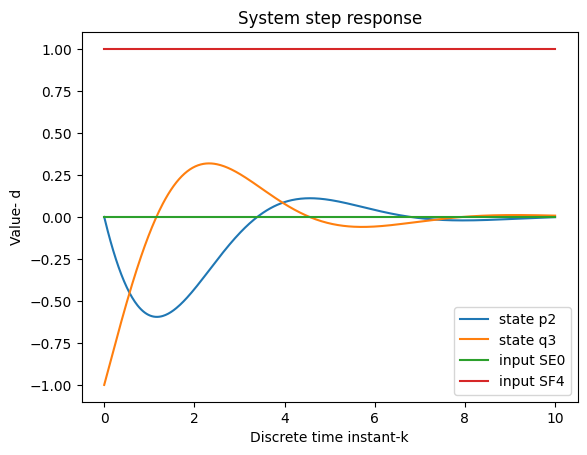

In [25]:
initial_state = [0.0, 0.0]
num_steps  = 501
input_sequence = [[0.0, 1.0] for _ in range(num_steps)] # input values on simulation time

# input_sequence[0][0] = 1.0
# input_sequence[0][1] = 1.0

# OR: input_sequence = [[np.sin(t)] for t in np.linspace(0, 5, num_steps)]
simulation_time_to = 10 # sec
time_steps = np.linspace(0, simulation_time_to, num_steps)
sampling_period = time_steps[1] - time_steps[0] # sampling_period=0.05
parameter_values = {'C3': 1/1.1, 'I2': 1.01, 'R1': 1.01} # С is complaence (not stifness K)


result = sim.simulate(initial_state, input_sequence, time_steps, sampling_period, parameter_values)

for ix, state_name in enumerate(sim.ss.x_vars):
    plt.plot(result['t'], result['y'][:,ix], label={"state " + str(state_name)})
    
for ix, input_name in enumerate(sim.ss.u_vars):
    plt.plot(result['t'], result['u'][:,ix], label={"input "+ str(input_name)})

plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')

plt.title('System step response')
plt.legend()
plt.show()

y.shape= (501, 2)
output_names= ['y1', 'y2']


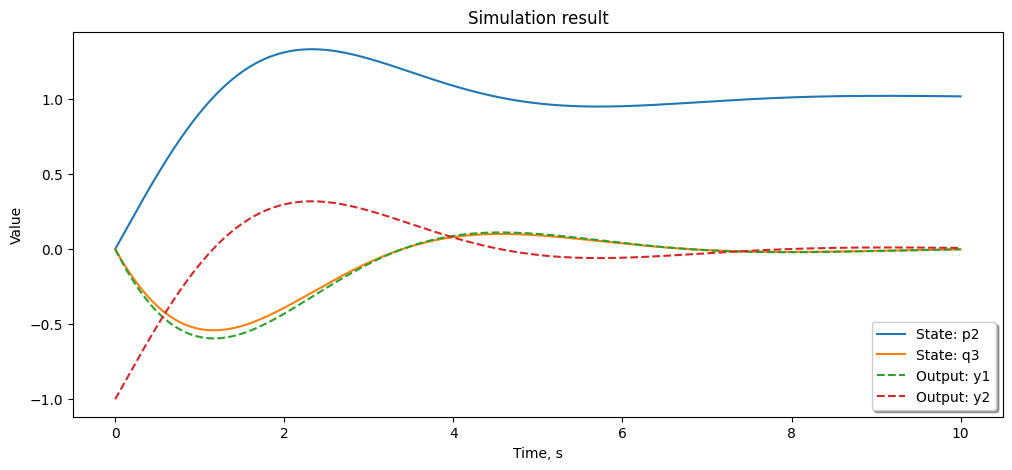

In [26]:
state_names = [str(s) for s in sim.ss.x_vars]        # ['q2', 'p3', ...]
output_names = [str(y) for y in sim.ss.output_vars]  # ['e4', 'f7', ...]

sim.plot_simulation_result(result, state_names, output_names)

AS WE CAN SEE MASS_SPRING SYSTEM BECAME STABLE OVER TIME